In [1]:
pip install fbprophet

In [3]:
from fbprophet import Prophet

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from google.colab import files
 
 
uploaded = files.upload()

Saving Time_series_analysis_and_forecast_DATASET.csv to Time_series_analysis_and_forecast_DATASET.csv


In [8]:
import io
 
df = pd.read_csv(io.BytesIO(uploaded['Time_series_analysis_and_forecast_DATASET.csv']))
print(df)

                  FullDate  Tmax     SysLoad  GasPrice  ElecPrice
0      2010-09-01 00:00:00  15.8  1688.21500    3.6900     23.710
1      2010-09-01 01:00:00  15.8  1669.19500    3.6900     22.635
2      2010-09-01 02:00:00  15.8  1491.98000    3.6900     22.565
3      2010-09-01 03:00:00  15.8  1330.76000    3.6900     18.910
4      2010-09-01 04:00:00  15.8  1247.94000    3.6900     18.030
...                    ...   ...         ...       ...        ...
92011  2021-02-28 19:00:00  24.3   449.63625    5.4848    117.925
92012  2021-02-28 20:00:00  24.3   815.59975    5.4848     87.880
92013  2021-02-28 21:00:00  24.3   745.12325    5.4848     62.060
92014  2021-02-28 22:00:00  24.3   694.95150    5.4848     62.000
92015  2021-02-28 23:00:00  24.3   714.69630    5.4848     62.955

[92016 rows x 5 columns]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [18]:
df['date'] = pd.to_datetime(df['FullDate']).dt.date
df['time'] = pd.to_datetime(df['FullDate']).dt.time

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92016 entries, 2010-09-01 to 2021-02-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
 5   time       92016 non-null  object        
 6   date       92016 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 7.6+ MB


In [20]:
#convert 'date' and 'time' to a time series object and use 'date' as index
from datetime import datetime

df['FullDate'] = pd.to_datetime(df.FullDate)
df['date'] = pd.to_datetime(df.date)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92016 entries, 2010-09-01 to 2021-02-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
 5   time       92016 non-null  object        
 6   date       92016 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(1)
memory usage: 7.6+ MB


In [22]:
df.set_index('date', inplace = True)

In [23]:
df.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
time         0
dtype: int64

In [24]:
#Resample to daily data points
df_daily = df.resample('D').sum()

Text(0, 0.5, 'ElecPrice')

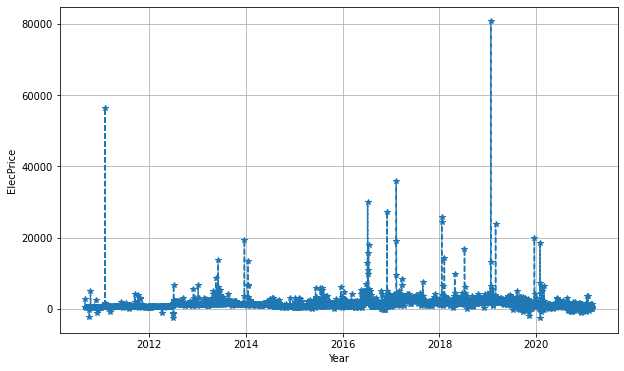

In [72]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_daily.index, df_daily.ElecPrice, '--' , marker= '*' , )
plt.grid()
plt.xlabel('Year')
plt.ylabel('ElecPrice')

In [76]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['SysLoad'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
 print(f'{k}: {v}') 


ADF Statistic: -3.6901589888366457
p-value: 0.004253725504574117
No. of lags used: 30
No. of observations used : 3803
Critical Values:
1%: -3.432070672988693
5%: -2.8623002987378547
10%: -2.567174716967499


In [77]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['GasPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
 print(f'{k}: {v}') 

ADF Statistic: -2.90276669716518
p-value: 0.04502721288462542
No. of lags used: 27
No. of observations used : 3806
Critical Values:
1%: -3.4320693157877544
5%: -2.8622996992165364
10%: -2.5671743978048323


In [25]:
df_daily.head()

,Tmax,SysLoad,GasPrice,ElecPrice
date,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [26]:
df_daily_copy = df_daily.reset_index()
df_daily_copy.head(2)

,date,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38,88.56,2751.70
1,2010-09-02,369.6,38898.99,88.56,570.81


In [27]:
#Create a subset of date and Global_active_power
df_daily_copy = df_daily_copy[['date','ElecPrice']]
df_daily_copy.head()

,date,ElecPrice
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [28]:
df_daily_copy = df_daily_copy.rename(columns={"date": "ds", "ElecPrice": "y"})

In [29]:
df_daily_copy.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [30]:
X = df_daily_copy
y  = df_daily_copy.y

In [31]:
x = int(len(X))
X_train, X_test = X[:2757], X[2757:]
y_train, y_test = y[:2757], y[2757:] 

In [32]:
model = Prophet()
model.fit(X_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
#predict for the next 12 months
future = model.make_future_dataframe(periods=20, freq='D') 
forecast = model.predict(future) 
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,851.777631,-1407.422710,3303.278100,851.777631,851.777631,144.250503,144.250503,144.250503,159.308129,159.308129,159.308129,-15.057627,-15.057627,-15.057627,0.0,0.0,0.0,996.028134
1,2010-09-02,851.727173,-1281.196651,3373.892497,851.727173,851.727173,224.453910,224.453910,224.453910,257.036327,257.036327,257.036327,-32.582418,-32.582418,-32.582418,0.0,0.0,0.0,1076.181083
2,2010-09-03,851.676716,-1363.306032,3314.194713,851.676716,851.676716,-0.584510,-0.584510,-0.584510,50.257478,50.257478,50.257478,-50.841988,-50.841988,-50.841988,0.0,0.0,0.0,851.092206
3,2010-09-04,851.626258,-1783.969133,2983.421987,851.626258,851.626258,-340.872526,-340.872526,-340.872526,-271.372061,-271.372061,-271.372061,-69.500465,-69.500465,-69.500465,0.0,0.0,0.0,510.753732
4,2010-09-05,851.575800,-2060.143647,2799.161915,851.575800,851.575800,-430.884955,-430.884955,-430.884955,-342.634443,-342.634443,-342.634443,-88.250512,-88.250512,-88.250512,0.0,0.0,0.0,420.690845
5,2010-09-06,851.525343,-1449.092779,3258.721411,851.525343,851.525343,30.835228,30.835228,30.835228,137.655349,137.655349,137.655349,-106.820121,-106.820121,-106.820121,0.0,0.0,0.0,882.360571
6,2010-09-07,851.474885,-1613.035164,3161.138174,851.474885,851.474885,-115.228484,-115.228484,-115.228484,9.749221,9.749221,9.749221,-124.977705,-124.977705,-124.977705,0.0,0.0,0.0,736.246401
7,2010-09-08,851.424427,-1396.119634,3424.745771,851.424427,851.424427,16.772717,16.772717,16.772717,159.308129,159.308129,159.308129,-142.535412,-142.535412,-142.535412,0.0,0.0,0.0,868.197144
8,2010-09-09,851.373970,-1439.338203,3430.989874,851.373970,851.373970,97.685677,97.685677,97.685677,257.036327,257.036327,257.036327,-159.350650,-159.350650,-159.350650,0.0,0.0,0.0,949.059647
9,2010-09-10,851.323512,-1503.785182,3173.990778,851.323512,851.323512,-125.068400,-125.068400,-125.068400,50.257478,50.257478,50.257478,-175.325877,-175.325877,-175.325877,0.0,0.0,0.0,726.255113


In [69]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [67]:
actual = y_train
pred = forecast['yhat'][:2757]

mape(actual, pred)

59.56227791978223

In [68]:
#calculate rmse
import sklearn
from sklearn.metrics import mean_squared_error
import math
from math import sqrt

actual = y_train
predicted = forecast['yhat'][:2757]

mse = sklearn.metrics.mean_squared_error(actual, predicted)

rmse = math.sqrt(mse)

print(rmse)

1862.9923179376394


In [34]:
# multivariate forecasting

In [46]:
df_daily_copy1 = df_daily.reset_index()
df_daily_copy1.head(2)

,date,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38,88.56,2751.70
1,2010-09-02,369.6,38898.99,88.56,570.81


In [47]:
#Create a subset of date and Global_active_power
df_daily_copy1 = df_daily_copy1[['date','ElecPrice','Tmax','SysLoad','GasPrice']]
df_daily_copy1.head()

,date,ElecPrice,Tmax,SysLoad,GasPrice
0,2010-09-01,2751.700,379.2,41565.380,88.56
1,2010-09-02,570.810,369.6,38898.990,88.56
2,2010-09-03,504.975,439.2,41665.760,106.80
3,2010-09-04,502.275,328.8,35638.085,81.36
4,2010-09-05,500.555,357.6,35611.410,106.80


In [48]:
df_daily_copy1 = df_daily_copy1.rename(columns={"date": "ds", "ElecPrice": "y"})

In [49]:
df.columns

Index(['FullDate', 'Tmax', 'SysLoad', 'GasPrice', 'ElecPrice', 'time'], dtype='object')

In [50]:
X = df_daily_copy1
y  = df_daily_copy1.y

In [51]:
x = int(len(X))
X_train, X_test = X[:2757], X[2757:]
y_train, y_test = y[:2757], y[2757:] 

In [52]:
model = Prophet()
model.add_regressor('Tmax',standardize=False)
model.add_regressor('SysLoad',standardize=False)
model.add_regressor('GasPrice',standardize=False)

In [53]:
model.fit(X_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
forecast1 = model.predict(X_test)